# 🧠 Data Science Salaries 2023 – Portfolio Project

## 📌 Project Overview

This project explores a dataset of data science-related job postings from 2023. The goal is to clean, analyze, and visualize salary trends across different roles, experience levels, employment types, and company characteristics.

## 🧪 Objectives

- Clean and prepare the dataset for analysis
- Handle missing values, duplicates, and outliers
- Perform exploratory data analysis (EDA)
- Visualize salary trends by:
  - Job title
  - Experience level
  - Remote work ratio
  - Company size and location
- Derive insights and observations from the data


📍Let’s begin by importing the data and performing initial cleaning.


# 📊 Project Outline – Data Science Salaries 2023

This notebook follows a structured data analysis process to explore global data science salary trends based on roles, experience, company size, and location.

---

**🧱 1. Data Loading and Overview**
- Import necessary libraries
- Load the dataset
- preview the data
- Quick Exploration Before Cleaning

**🧹 2. Data Cleaning**
- Remove duplicates
- Make categorical codes readable
- Handle outliers

**🔍 3. Exploratory Data Analysis (EDA)**
- Summary Statistics for numerical columns and Categorical columns
- Salary Distribution: Histogram with Mean, Median, and Mode
- Salary by categorical columns (Experience Level, Employment Type, Company Size)
- Number of Job Records by Year.
- Salary Distribution for Top 10 Job Titles
- Median Data Science Salary by Country (USD)
- Bar Plot of Average Salary by Remote Ratio
- Average Salary by Remote Type & Experience Level Heatmap:

**🔍 4. Key Questions & Insights**

Here are some important questions I explored based on the dataset:

1. Do remote roles pay more than in-office ones?
2. Which experience level earns the most across remote types?
3. What are the top-paying job titles?
4. How do salaries compare by company size?
5. Are there countries where data scientists are paid significantly more?


**📌 5. Key Insights & Observations**
- Summarize trends and patterns
- Highlight interesting findings

**📁 6. Final Notes and Recommendations**
- Summary
- Recommendation for future work


# 🧱 1. Data Loading and Overview

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
# load the dataset
df = pd.read_csv(r'C:\Users\شيماء\Desktop\new project\ds_salaries.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\شيماء\\Desktop\\new project\\ds_salaries.csv'

In [ ]:
# preview the data: 
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [48]:
#Quick Exploration Before Cleaning:
print('The shape of the data is ', df.shape)
print('The data types of the columns are: ', df.dtypes)
print('The number of missing values in the data are:', df.isnull().sum().sum())
print('The number of unique values in each columns are:', df.nunique())
print('The number of duplicates in the data are: ', df.duplicated().sum())




The shape of the data is  (3755, 11)
The data types of the columns are:  work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
The number of missing values in the data are: 0
The number of unique values in each columns are: work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64
The number of duplicates in the data are:  1171


# 🧹 2. Data Cleaning
## Apply Cleaning Steps:

In [49]:

# 1- Drop duplicates
df.drop_duplicates(inplace= True)
# 2- Make categorical codes readable:
df['experience_level'] = df['experience_level'].map({
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior',
    'EX': 'Executive'
})

df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})
  

## Haandling outliers:

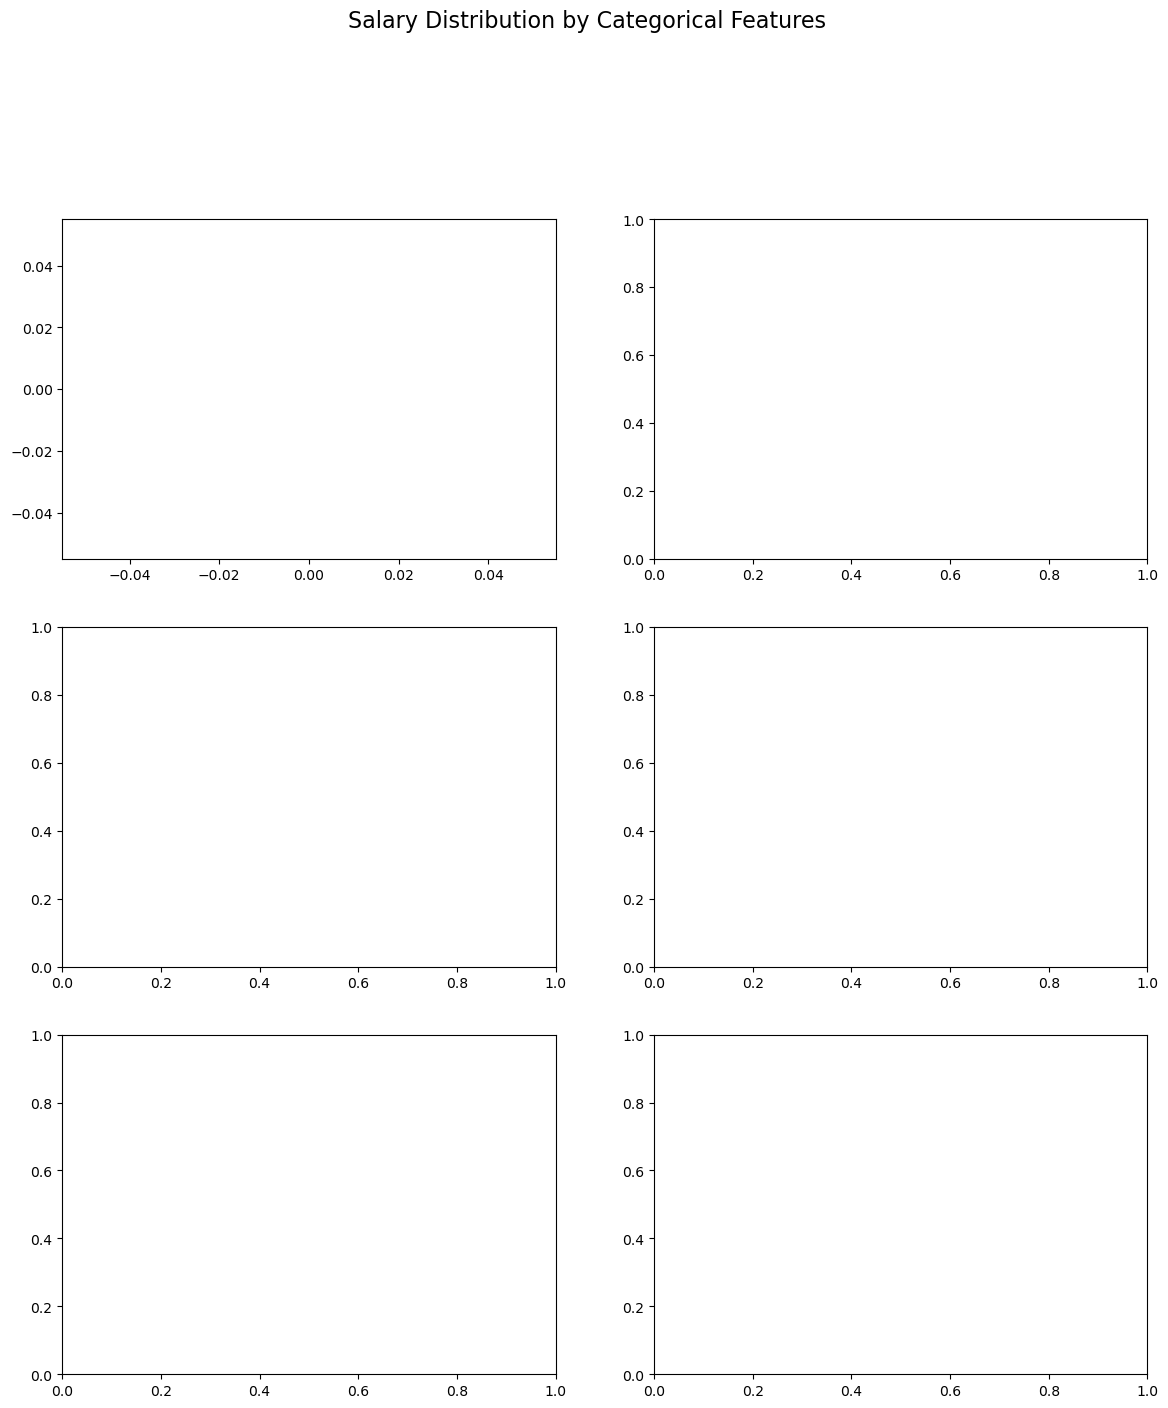

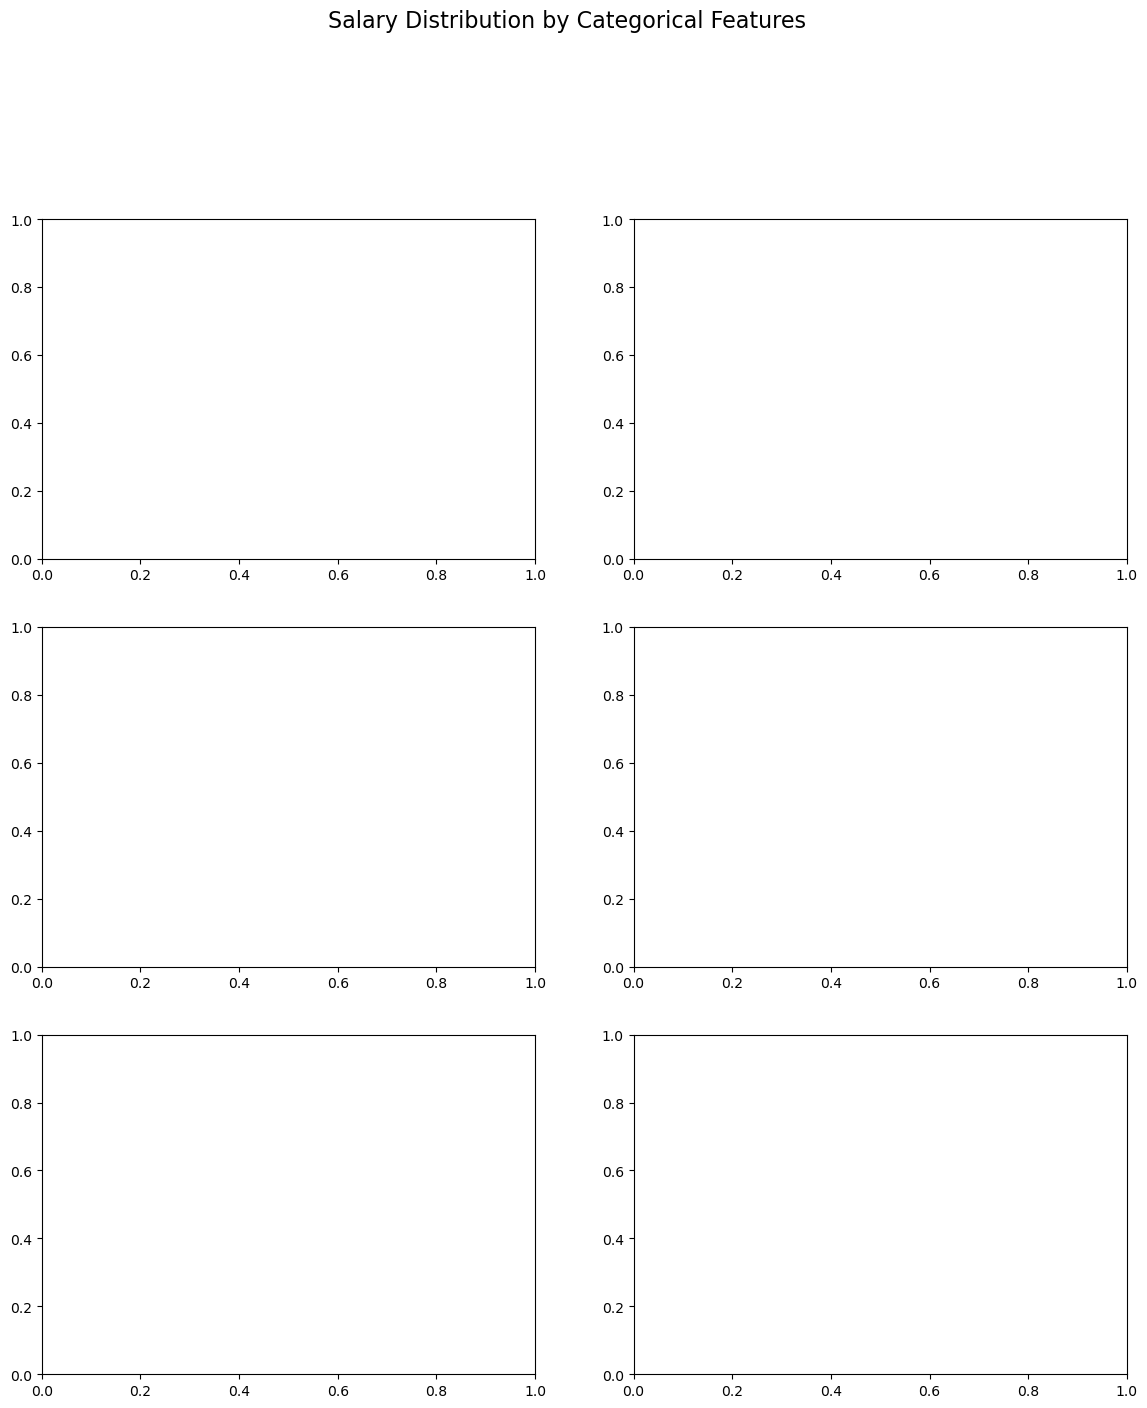

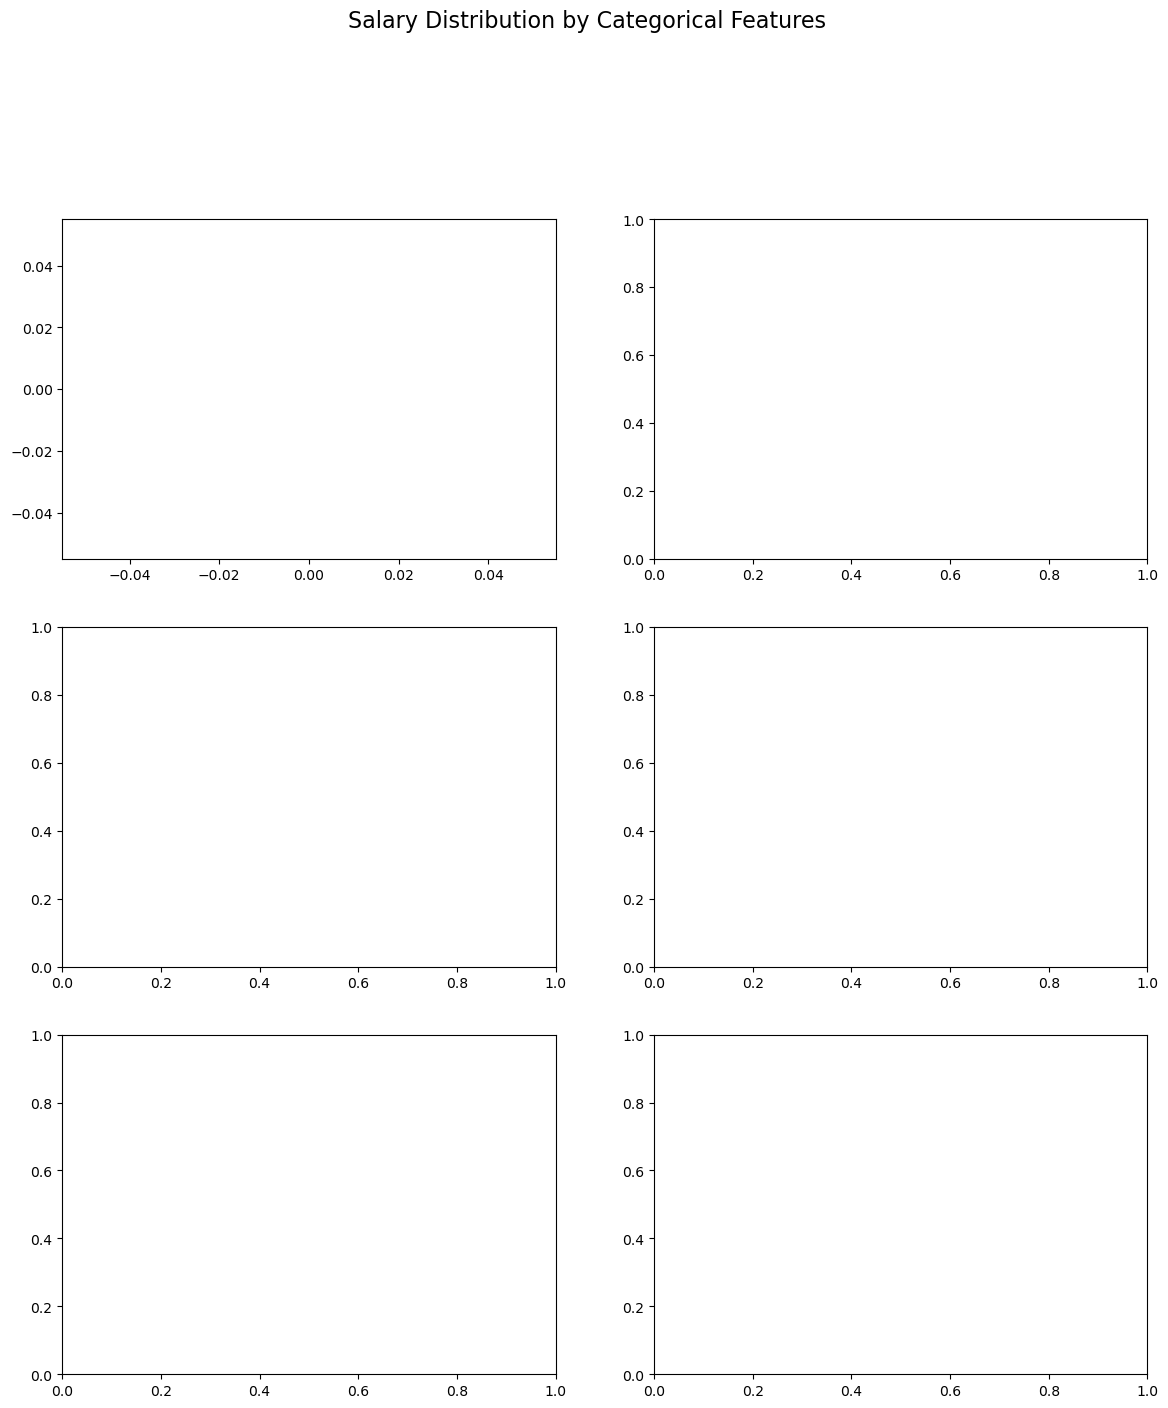

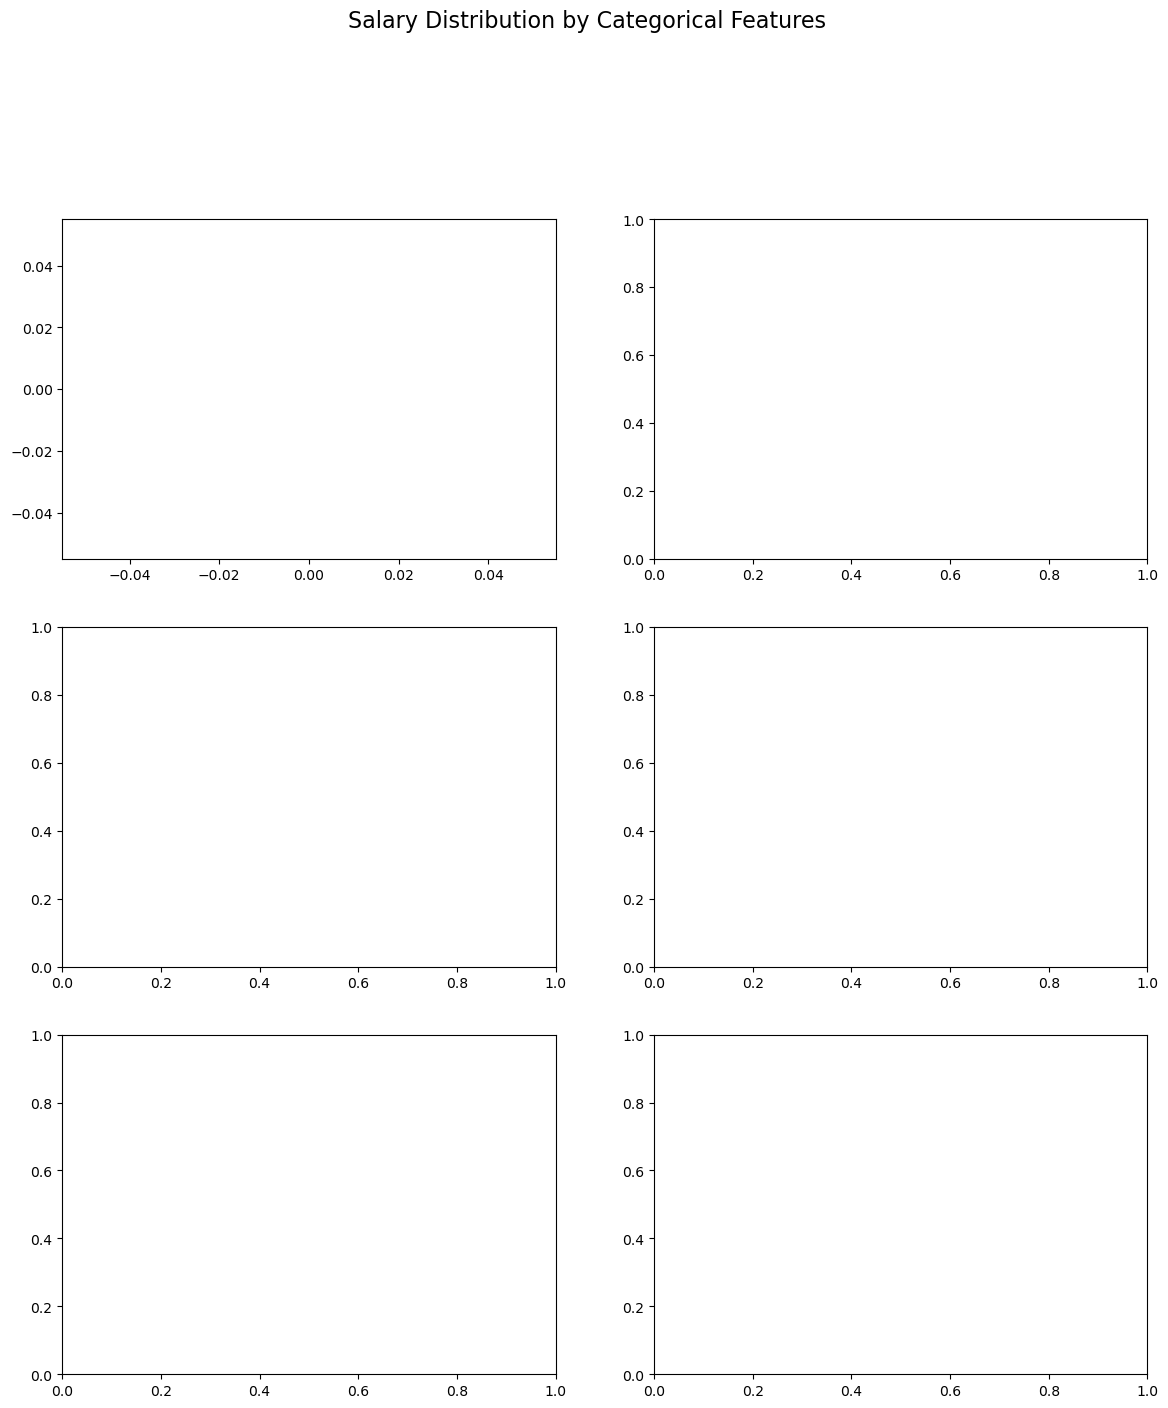

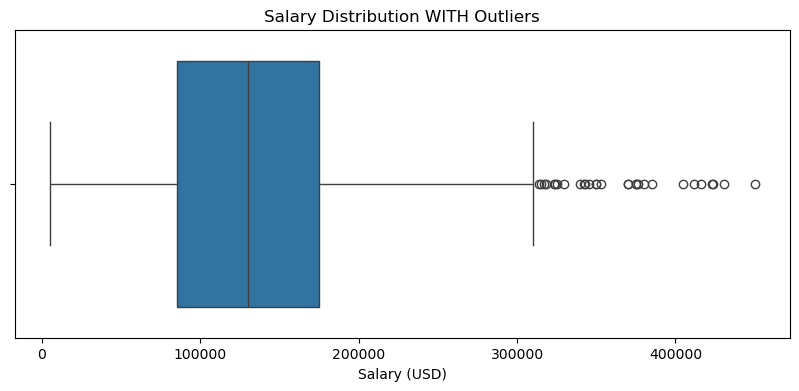

In [50]:
#Plot Salary Distribution With Outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Salary Distribution WITH Outliers')
plt.xlabel('Salary (USD)')
plt.show()


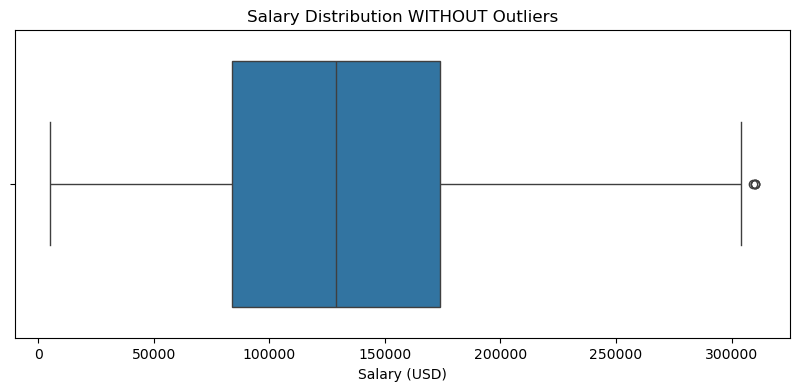

In [51]:
#Remove Outliers (Using IQR Method)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Create a new DataFrame without outliers
df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]
#Plot Salary Distribution Without Outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x='salary_in_usd', data=df_no_outliers)
plt.title('Salary Distribution WITHOUT Outliers')
plt.xlabel('Salary (USD)')
plt.show()


## Data Cleaning Summary

Before starting the exploratory data analysis (EDA), the dataset underwent the following cleaning steps:

- **Duplicate Removal:** All duplicate records were identified and dropped to avoid data redundancy.
- **Categorical Code Mapping:** Encoded categorical variables (`experience_level`, `employment_type`, and `company_size`) were mapped to more readable and descriptive labels for better interpretability.
- **Missing Values:** The dataset contained no missing values, so no imputation was necessary.
- **Outlier Handling:** Some extremely high salaries (above $400K), mostly from executive-level or remote roles, were identified as outliers. These were excluded from average-based visualizations to maintain clarity in insights.

With these cleaning steps completed, the dataset is now prepared for thorough exploratory data analysis.


# 🔍 3. Exploratory Data Analysis (EDA)

## Summary Statistics for numerical columns and Categorical columns

In [52]:
# Summary Statistics for numerical columns and Categorical columns
print('Summary Statistics for numerical columns:')
display(df_no_outliers.describe().T)
print("**"*10)
print('Summary Statistics for categorical columns:')
display(df_no_outliers.describe(include=['object']).T)

Summary Statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
work_year,2555.0,2022.301761,0.746262,2020.0,2022.0,2022.0,2023.0,2023.0
salary,2555.0,208221.787084,812048.908595,6000.0,90000.0,133300.0,180000.0,30400000.0
salary_in_usd,2555.0,130781.807828,62656.443183,5132.0,84053.0,128875.0,174000.0,310000.0
remote_ratio,2555.0,50.547945,48.162122,0.0,0.0,50.0,100.0,100.0


********************
Summary Statistics for categorical columns:


,count,unique,top,freq
experience_level,2555,4,Senior,1535
employment_type,2555,4,Full-time,2519
job_title,2555,92,Data Engineer,596
salary_currency,2555,19,USD,2080
employee_residence,2555,77,US,1866
company_location,2555,72,US,1902
company_size,2555,3,Medium,2009


## Salary Distribution: Histogram with Mean, Median, and Mode:

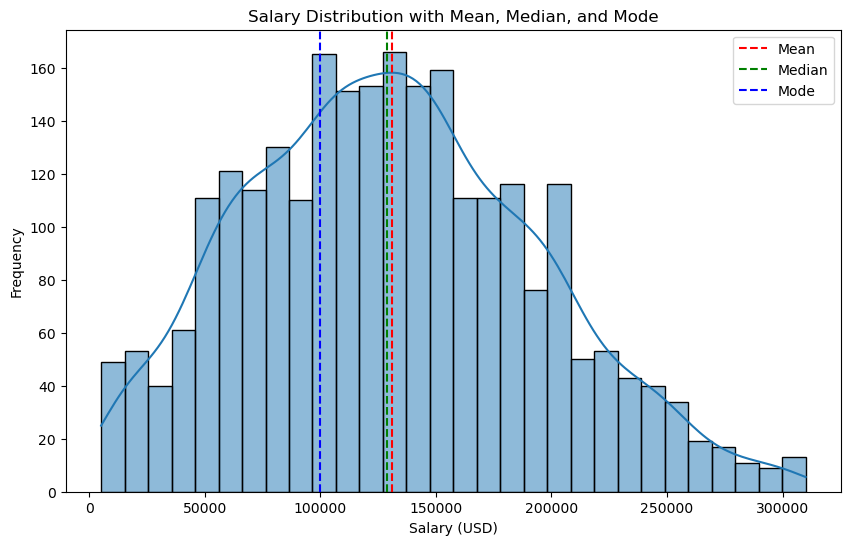

In [64]:
# Salary Distribution: Histogram with Mean, Median, and Mode:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['salary_in_usd'], bins=30, kde=True)
plt.axvline(df_no_outliers['salary_in_usd'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_no_outliers['salary_in_usd'].median(), color='g', linestyle='--', label='Median')
plt.axvline(df_no_outliers['salary_in_usd'].mode()[0], color='b', linestyle='--', label='Mode')
plt.title('Salary Distribution with Mean, Median, and Mode')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Salary Distribution Insights**
The salary distribution visualizations provide an overview of how salaries are spread throughout the dataset.

**📊 Histogram Overview**
- The histogram displays the frequency of salaries across defined salary ranges.
- **Mean**, **median**, and **mode** lines are included to highlight the central tendency and distribution shape.
- The distribution is **right-skewed**, meaning most salaries are clustered at the lower end, with a few very high salaries pulling the mean upward.



## Salary by categorical columns (Experience Level, Employment Type, Company Size):

C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\1390277606.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\1390277606.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\1390277606.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




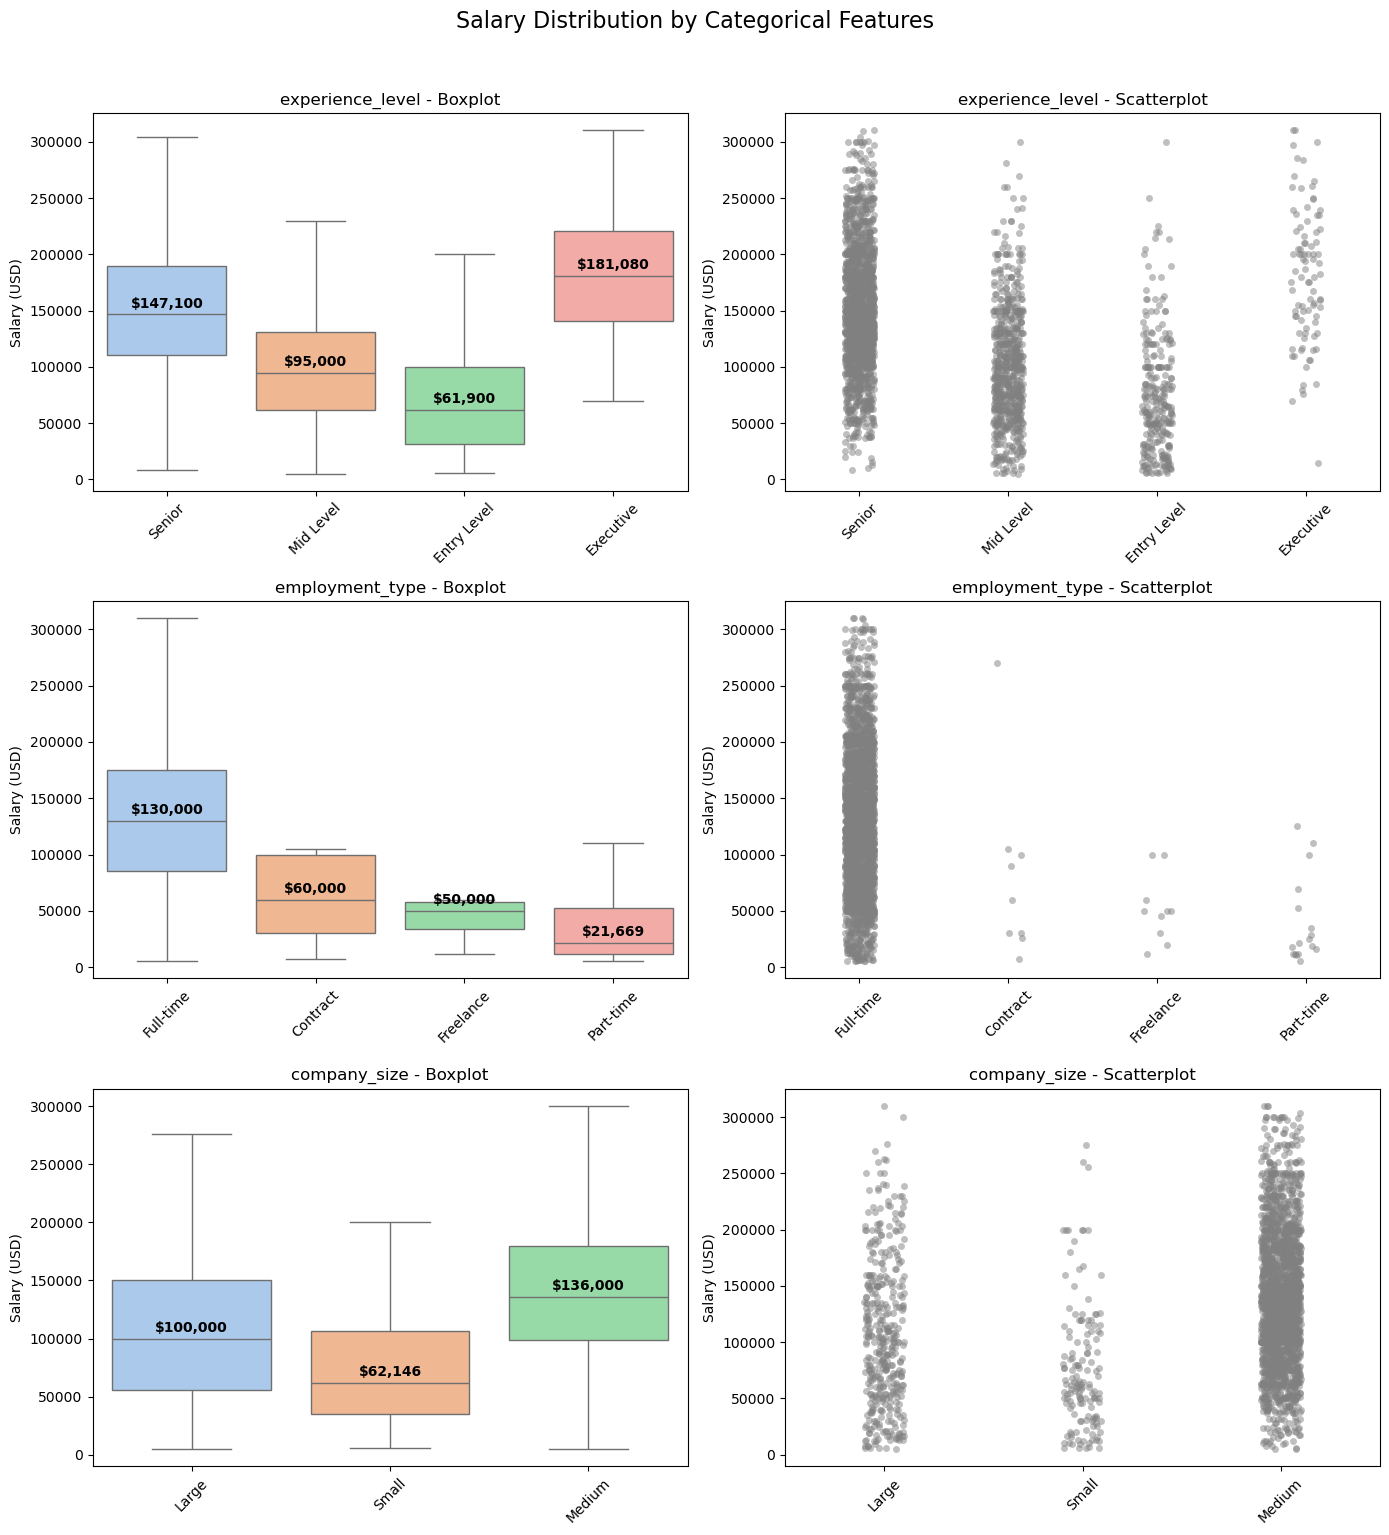

In [62]:
#Salary by categorical columns (Experience Level, Employment Type, Company Size):

cat_cols = ['experience_level', 'employment_type', 'company_size']
n = len(cat_cols)

fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, 5 * n))
fig.suptitle('Salary Distribution by Categorical Features', fontsize=16, y=1.02)

for i, col in enumerate(cat_cols):
    # -------- Boxplot --------
    ax_box = axes[i, 0]
    sns.boxplot(x=col, y='salary_in_usd', data=df_no_outliers, ax=ax_box, palette='pastel', showfliers=False)
    ax_box.set_title(f'{col} - Boxplot')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('Salary (USD)')
    ax_box.tick_params(axis='x', rotation=45)

    # Add median annotations
    medians = df_no_outliers.groupby(col)['salary_in_usd'].median()
    for tick, label in enumerate(ax_box.get_xticklabels()):
        category = label.get_text()
        median_val = medians[category]
        ax_box.text(
            tick,
            median_val + 3000,  # Adjust this to control vertical position
            f"${median_val:,.0f}",
            ha='center',
            va='bottom',
            fontsize=10,
            color='black',
            fontweight='bold'
        )

    # -------- Scatter (strip) plot --------
    ax_strip = axes[i, 1]
    sns.stripplot(x=col, y='salary_in_usd', data=df_no_outliers, ax=ax_strip,
                  jitter=True, alpha=0.5, color='gray')
    ax_strip.set_title(f'{col} - Scatterplot')
    ax_strip.set_xlabel('')
    ax_strip.set_ylabel('Salary (USD)')
    ax_strip.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Salary Distribution by Categorical Features (with Median Annotations)**

The following visualizations compare salary distributions across key categorical features: **Experience Level**, **Employment Type**, and **Company Size**. Each pair of plots includes:

- 📦 **Boxplots** showing the spread, central tendency, and interquartile range (IQR) of salaries.
- 🔘 **Scatter plots (strip plots)** overlaid with jitter to visualize the distribution and density of individual salary records.

**💡 Key Enhancements:**
- **Median salary values** are annotated above each box in the boxplots for clear comparison.
- **Outliers are hidden** in boxplots to better highlight the main salary range for each group.




**🔍 Key Takeaways from Salary by Categorical Features**

**1. 💼 Experience Level**
- Salaries **increase clearly with experience**. Executive and Senior roles earn significantly more than Entry or Mid-level positions.
- **Executive roles** show a wider spread in salary, possibly due to industry differences or negotiation power.
- **Entry-level roles** are more tightly clustered, reflecting limited variation in junior salaries.

**2. 🕒 Employment Type**
- **Full-time positions dominate** the dataset and offer the highest salary range on average.
- **Contract and freelance roles** are fewer but show a wide salary spread—possibly reflecting both short-term gigs and niche expert roles.
- **Part-time roles** are rare and tend to offer significantly lower salaries.

**3. 🏢 Company Size**
- **Large companies** tend to offer **higher salaries** than small or medium ones.
- **Small companies** show a wide spread in salaries—some may offer competitive pay to attract talent.
- Median salary differences are visible and may relate to company resources, market presence, or job seniority.

**🧠 General Observations**
- Removing outliers helped better visualize patterns without distortion.
- Annotated medians provide quick reference points for comparison.
- Combining boxplots and stripplots helps understand both summary statistics and individual variation.



## Number of Job Records by Year

C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\822489774.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




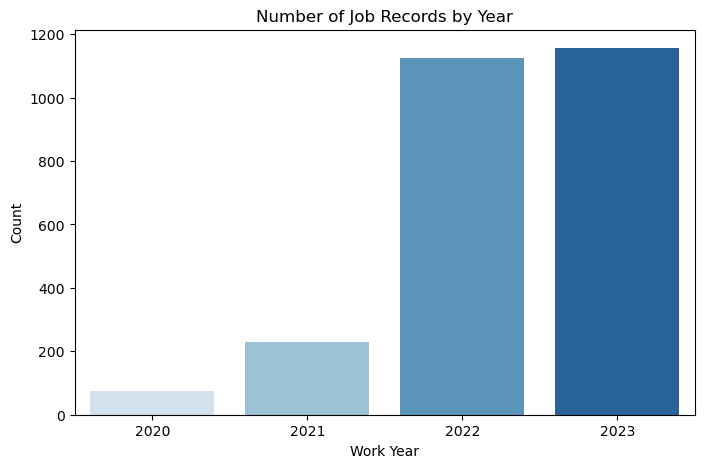

In [55]:
#Number of Job Records by Year
plt.figure(figsize=(8, 5))
sns.countplot(x='work_year', data=df, palette='Blues')
plt.title('Number of Job Records by Year')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()


## Salary Distribution for Top 10 Job Titles

C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\2817571543.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




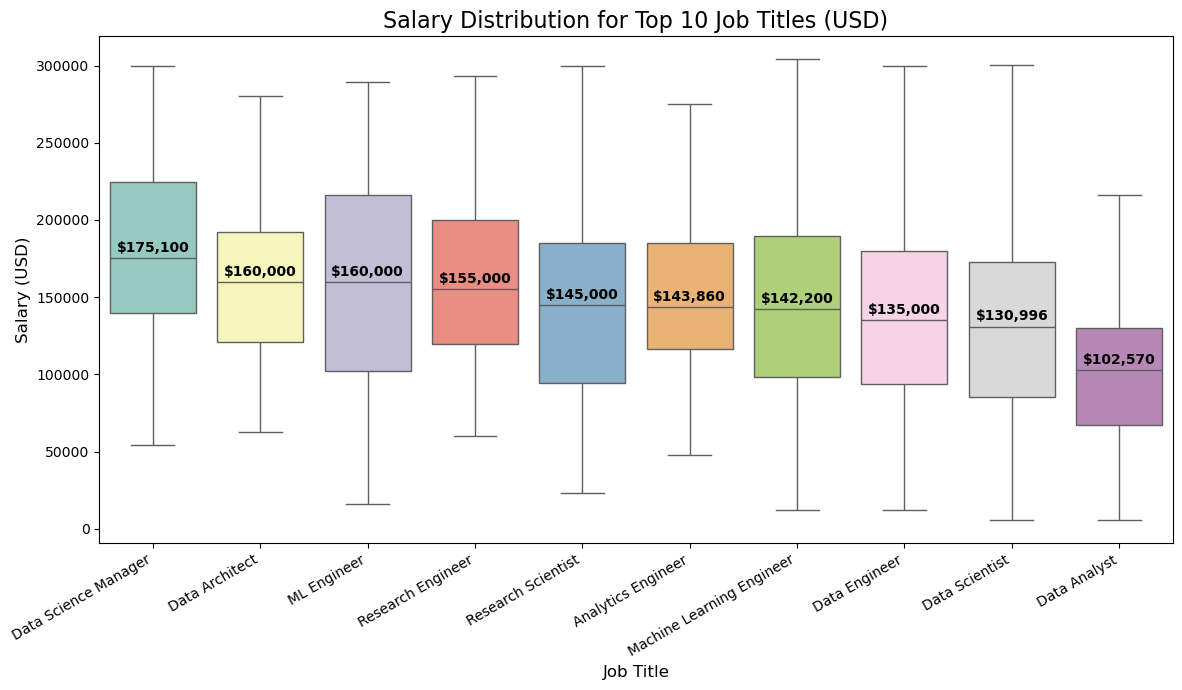

In [57]:
#Salary Distribution for Top 10 Job Titles
# Use df_no_outliers for cleaner salary distribution visualization

top_jobs = df_no_outliers['job_title'].value_counts().head(10).index

median_salaries = df_no_outliers[df_no_outliers['job_title'].isin(top_jobs)] \
    .groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)
ordered_jobs = median_salaries.index

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_no_outliers[df_no_outliers['job_title'].isin(top_jobs)],
    x='job_title',
    y='salary_in_usd',
    order=ordered_jobs,
    palette='Set3',
    showfliers=False
)

# Add median labels
for i, job in enumerate(ordered_jobs):
    median_val = median_salaries[job]
    plt.text(i, median_val + 2000, f"${median_val:,.0f}", ha='center',
             va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=30, ha='right')
plt.title('Salary Distribution for Top 10 Job Titles (USD)', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.tight_layout()
plt.show()


**💡 Insights: Salary Distribution for Top 10 Job Titles**

- The boxplot visualizes the salary ranges for the ten most common job titles in the dataset, with outliers removed for clarity.
- Median salaries are annotated above each box, making it easy to compare typical pay across roles.
- **Data Science Manager** and **Data Architect** roles have the highest median salaries among the top 10, followed by ML Engineer and Research Engineer.
- **Data Analyst** has the lowest median salary in this group, reflecting its more entry-level or support nature compared to other roles.
- The spread of salaries within each job title varies, indicating differences in experience, company, or region even within the same role.

## 🌍 Median Data Science Salary by Country (USD)

In [68]:
import plotly.express as px

# Step 1: Group by employee_residence and calculate median salary
country_salary = df_no_outliers.groupby('employee_residence')['salary_in_usd'].median().reset_index()
country_salary.columns = ['Country_Code', 'Median_Salary']

# Step 2: Convert ISO-2 codes to ISO-3 using manual mapping
iso2_to_iso3 = {
    'US': 'USA', 'DE': 'DEU', 'ES': 'ESP', 'CA': 'CAN', 'GB': 'GBR', 'IN': 'IND',
    'FR': 'FRA', 'NG': 'NGA', 'PT': 'PRT', 'NL': 'NLD', 'CH': 'CHE', 'AU': 'AUS',
    'IE': 'IRL', 'SG': 'SGP', 'BR': 'BRA', 'IT': 'ITA', 'PK': 'PAK', 'RU': 'RUS',
    'PH': 'PHL', 'MX': 'MEX', 'MY': 'MYS', 'AE': 'ARE', 'JP': 'JPN', 'SE': 'SWE',
    'FI': 'FIN', 'PL': 'POL', 'KE': 'KEN', 'AR': 'ARG', 'TH': 'THA', 'RO': 'ROU',
    'ID': 'IDN', 'EG': 'EGY', 'BE': 'BEL', 'CO': 'COL', 'IL': 'ISR', 'AT': 'AUT',
    'DK': 'DNK', 'CZ': 'CZE', 'CN': 'CHN', 'GR': 'GRC', 'HU': 'HUN', 'ZA': 'ZAF'
    # Add more if needed
}

country_salary['ISO3'] = country_salary['Country_Code'].map(iso2_to_iso3)

# Step 3: Drop rows where ISO3 conversion failed
country_salary.dropna(subset=['ISO3'], inplace=True)

# Step 4: Create the choropleth map
fig = px.choropleth(
    country_salary,
    locations='ISO3',
    locationmode='ISO-3',
    color='Median_Salary',
    color_continuous_scale='Viridis',
    title='🌍 Median Data Science Salary by Country (USD)',
    labels={'Median_Salary': 'Median Salary (USD)'}
)

fig.update_geos(projection_type="natural earth")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


**🌍 Median Data Science Salary by Country (USD)**

The choropleth map above visualizes the median data science salary by country, based on employee residence. Key points:

- **Darker colors** indicate higher median salaries.
- The **United States** leads with the highest median salary, followed by countries like **Malaysia**, **China**, and **Canada**.
- **Western Europe** (e.g., Germany, UK, Switzerland) also shows strong median salaries.
- **Emerging markets** (e.g., India, Egypt, Indonesia) have lower median salaries, reflecting regional economic differences.
- This visualization highlights global disparities and can guide professionals considering international opportunities.

## Bar Plot of Average Salary by Remote Ratio

C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\3291520673.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



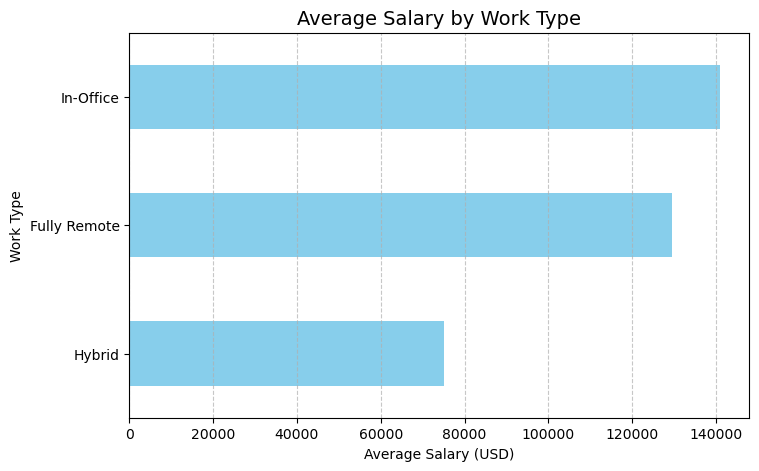

In [59]:
# Bar Plot of Average Salary by Remote Ratio
# Convert to readable labels
df_no_outliers['remote_work_type'] = df_no_outliers['remote_ratio'].map({
    0: 'In-Office',
    50: 'Hybrid',
    100: 'Fully Remote'
})


avg_salary_remote = df_no_outliers.groupby('remote_work_type')['salary_in_usd'].mean().sort_values()

avg_salary_remote.plot(kind='barh', color='skyblue', figsize=(8, 5))
plt.title('Average Salary by Work Type', fontsize=14)
plt.xlabel('Average Salary (USD)')
plt.ylabel('Work Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


 **📊 Average (Mean) Salary by Remote Type**
- The bar chart shows that **In office** roles have the **highest average salary**, followed by **Fully Remote**, and then **Hybird** roles.

## Average Salary by Remote Type & Experience Level Heatmap: 

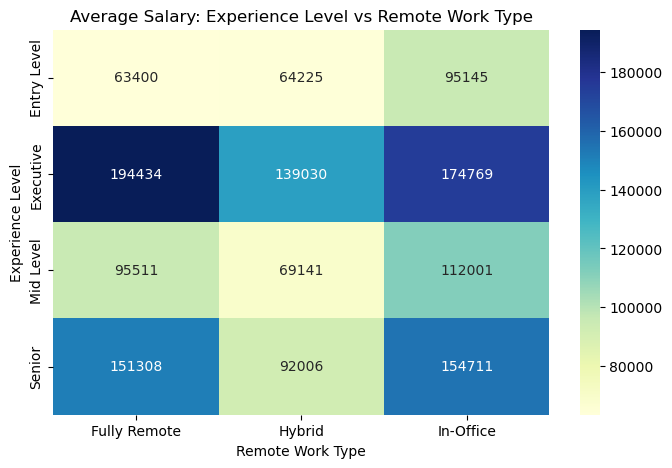

In [60]:
# Average Salary by Remote Type & Experience Level Heatmap:
# Create pivot table
pivot = df_no_outliers.pivot_table(
    index='experience_level',
    columns='remote_work_type',
    values='salary_in_usd',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Salary: Experience Level vs Remote Work Type')
plt.xlabel('Remote Work Type')
plt.ylabel('Experience Level')
plt.show()

**🔥 Heatmap: Average Salary by Experience Level and Remote Work Type**

The heatmap above visualizes the average salary for each combination of experience level and remote work type:

- **Executive and Senior roles** consistently command the highest average salaries, regardless of remote arrangement.
- **Fully Remote** and **In-Office** roles generally offer higher average salaries than **Hybrid** roles across all experience levels.
- **Entry Level** salaries are noticeably lower, but even here, in-office roles tend to pay more than remote or hybrid.
- The heatmap makes it easy to spot salary trends and compare how remote work impacts compensation at different career stages.

# 🔍 4. Key Questions & Insights

Here are some important questions I explored based on the dataset:

1. Do remote roles pay more than in-office ones?
2. Which experience level earns the most across remote types?
3. What are the top-paying job titles?
4. How do salaries compare by company size?
5. Are there countries where data scientists are paid significantly more?

## 1. Do remote roles pay more than in-office ones?


C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\276152075.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




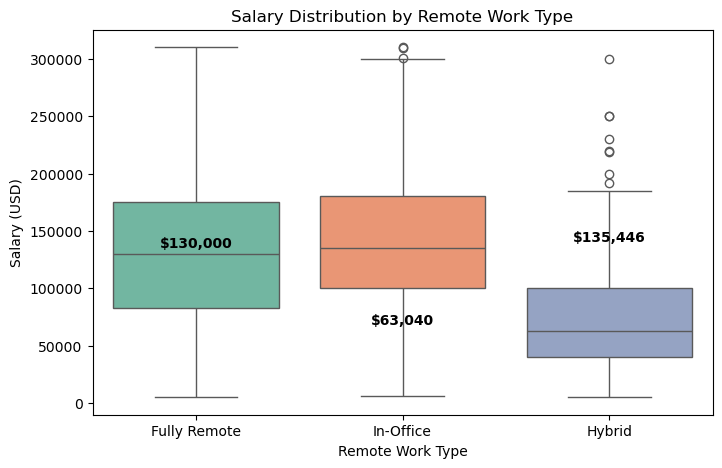

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_no_outliers, x='remote_work_type', y='salary_in_usd', palette='Set2')
plt.title('Salary Distribution by Remote Work Type')
plt.xlabel('Remote Work Type')
plt.ylabel('Salary (USD)')

# Add median salary annotation for each remote work type
medians = df_no_outliers.groupby('remote_work_type')['salary_in_usd'].median()
for i, remote_type in enumerate(medians.index):
    median_val = medians[remote_type]
    plt.text(i, median_val + 3000, f"${median_val:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.show()


**💼 Salary Trends by Remote Work Type**

To better understand how salary varies based on remote work type, we analyzed both **mean** and **median** salaries.

**📊 Average (Mean) Salary by Remote Type**
- The bar chart shows that **In office** roles have the **highest average salary**, followed by **Fully Remote**, and then **Hybird** roles.
- However, salary data is **right-skewed**, meaning a few very high salaries can pull the mean upward.

**📦 Median Salary by Remote Type (Boxplot)**
- The boxplot with median annotations reveals a more balanced picture:
  - **Hybrid** roles have the **highest median salary** (~$135K).
  - **Fully Remote** roles have a slightly lower median (~$130K).
  - **In-Office** roles have the lowest median (~$63K).


## 2. Which experience level earns the most across remote types?

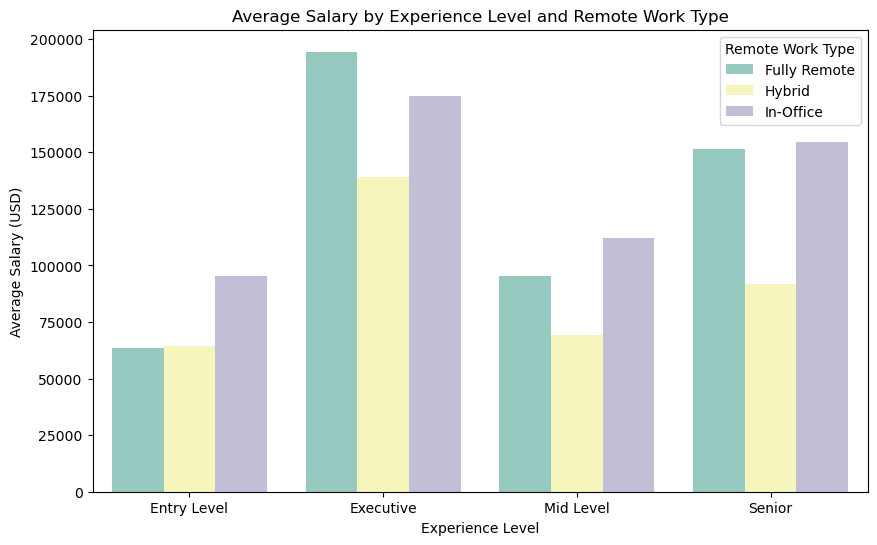

In [66]:
grouped = df_no_outliers.groupby(['experience_level', 'remote_work_type'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='experience_level', y='salary_in_usd', hue='remote_work_type', palette='Set3')
plt.title('Average Salary by Experience Level and Remote Work Type')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Remote Work Type')
plt.show()


**Q2: Which experience level earns the most across remote types?**

- As expected, **Executive-level roles have the highest salaries**, across all remote work types.
- Interestingly, **Senior and Mid-Level remote roles often earn more than their in-office counterparts**.
- Entry-level roles show less variation, suggesting remote status has less influence early in a career.

➡️ This analysis shows that **both experience and work flexibility play a role in salary trends** — with remote senior roles standing out as especially well-paid.


## 3. What are the top-paying job titles?

C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\2541024411.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\2541024411.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




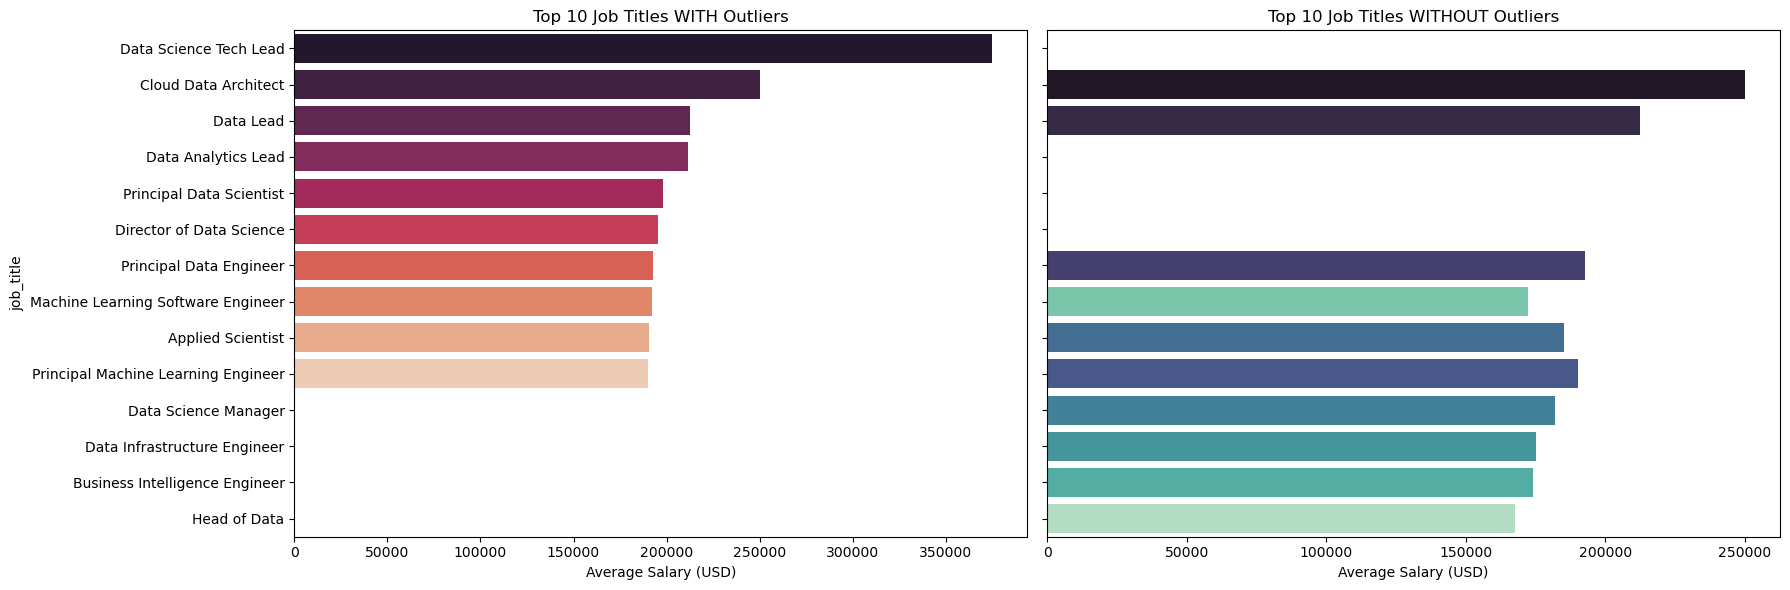

In [22]:
# Calculate top 10 average salaries by job title (with and without outliers)
top_jobs_with_outliers = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs_no_outliers = df_no_outliers.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.barplot(x=top_jobs_with_outliers.values, y=top_jobs_with_outliers.index, ax=axes[0], palette='rocket')
axes[0].set_title('Top 10 Job Titles WITH Outliers')
axes[0].set_xlabel('Average Salary (USD)')

sns.barplot(x=top_jobs_no_outliers.values, y=top_jobs_no_outliers.index, ax=axes[1], palette='mako')
axes[1].set_title('Top 10 Job Titles WITHOUT Outliers')
axes[1].set_xlabel('Average Salary (USD)')

plt.tight_layout()
plt.show()


**Top 10 Highest Paying Data Science Job Titles: With vs Without Outliers**

This comparison shows how outliers impact the average salaries for different job titles.

- The **left plot** includes all data, showing extreme salaries in executive or rare roles.
- The **right plot** removes outliers for a more typical salary view.
  
By comparing both, we gain a clearer understanding of salary distribution across roles and avoid being misled by extreme values.


## 4. How do salaries compare by company size?

Average salary by company size 
 company_size
Small      76051.705479
Large     107158.955000
Medium    139462.612245
Name: salary_in_usd, dtype: float64


C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\3033497053.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




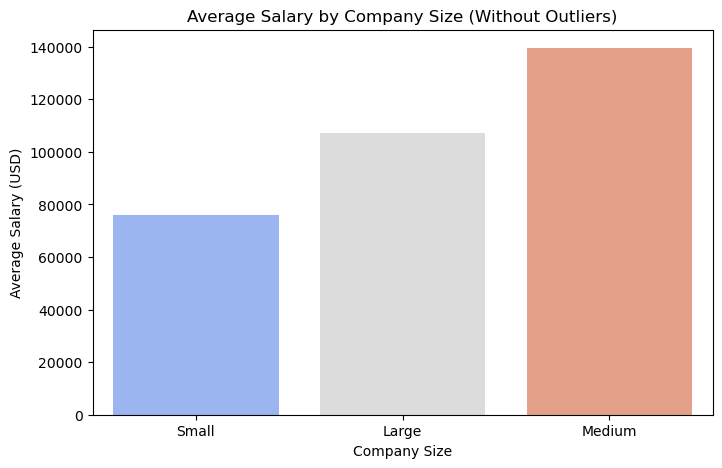

In [23]:
avg_salary_by_size = df_no_outliers.groupby('company_size')['salary_in_usd'].mean().sort_values()
print("Average salary by company size \n",avg_salary_by_size)
# Plot average salary by company size

plt.figure(figsize=(8,5))
sns.barplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values, palette='coolwarm')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size (Without Outliers)')
plt.show()


**💼 Salary Comparison by Company Size**

This section explores how average salaries vary across different company sizes using the cleaned dataset (without outliers) to reflect more typical salary patterns.

We define company sizes as follows:

- 🟢 **Small**: Fewer than 50 employees  
- 🟡 **Medium**: Between 50 and 250 employees  
- 🔵 **Large**: More than 250 employees  

**💡 Key Insight:**
> Medium-sized companies offer the highest average salaries, followed by large companies. Small companies tend to offer lower average salaries in comparison.

This trend may reflect the balance medium companies achieve between flexibility, competitive compensation, and growth investment.



## 5. Are there countries where data scientists are paid significantly more?

Note: you may need to restart the kernel to use updated packages.
employee_residence
MY    200000.000000
PR    166000.000000
US    150987.206324
CA    130859.839506
CN    125404.000000
NZ    125000.000000
BA    120000.000000
IE    114943.428571
DO    110000.000000
RU    105750.000000
Name: salary_in_usd, dtype: float64


C:\Users\شيماء\AppData\Local\Temp\ipykernel_9716\2217476263.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




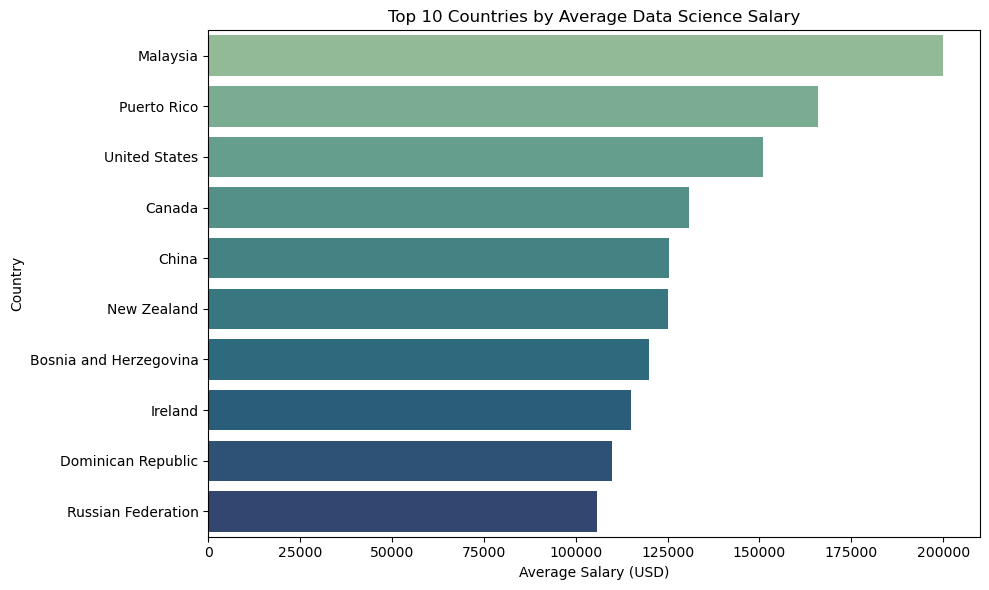

In [ ]:
%pip install pycountry
import pycountry

avg_salary_by_country = df_no_outliers.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
top_countries = avg_salary_by_country.head(10)
print(top_countries)
# Plot average salary by country
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")
plt.xlabel("Average Salary (USD)")
# Map ISO country codes to country names for the y-axis labels

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

country_names = [get_country_name(code) for code in top_countries.index]
plt.ylabel("Country")
plt.yticks(ticks=range(len(country_names)), labels=country_names)
plt.title("Top 10 Countries by Average Data Science Salary")
plt.tight_layout()
plt.show()



**🌍 Top 10 Countries by Average Data Science Salary**

The bar chart above displays the average data science salary for the top 10 countries, based on employee residence. Country names are shown for clarity.

- **Malaysia** leads with the highest average salary, followed by **Puerto Rico** and the **United States**.
- Other countries in the top 10 include **Canada**, **China**, and several from Europe and Asia.
- This ranking highlights significant global differences in compensation for data science roles, influenced by local economies, demand, and cost of living.
- Note: Results are based on the cleaned dataset (outliers removed) to better reflect typical salary levels.

# 📌 Key Insights & Observations

After a thorough data cleaning and exploratory data analysis process, several meaningful patterns emerged from the data:

### 🧠 General Observations
- The dataset contained no missing values but required:
  - Removing duplicates
  - Replacing encoded categorical values with readable labels
  - Handling extreme salary outliers to improve visual clarity and statistical accuracy

### 💰 Salary Trends & Patterns
- **Experience Level:** Salaries increase with experience. Executive-level roles earn significantly more, while entry-level roles earn the least.
- **Employment Type:** Full-time roles dominate and offer the highest and most stable salaries. Freelance and part-time roles show greater variance and lower medians.
- **Company Size:** Surprisingly, **medium-sized companies** tend to pay more on average than large and small ones.
- **Job Titles:** Data Science Manager and Data Architect roles have the highest median salaries among the top 10, followed by ML Engineer and Research Engineer..
- **Country Differences:** Malaysia leads with the highest median salary, followed by countries like Puerto Rico, United States, and Chaina.
- **Salary Distribution:** The salary distribution is right-skewed. The mean salary is higher than the median, indicating a few high earners pulling the average up.

### 🔥 Notable Insights from Key Questions
1. ✅ **Remote roles** 
- Mean salaries suggest that in office work pays best — but this is influenced by outliers.
- Median salaries show that **Hybrid work** tends to offer the most consistent high pay.
- This highlights the importance of using **both mean and median** to interpret salary trends accurately.
2. 👔 **Executives working remotely** earn the highest salaries across all segments
3. 🏆 **cloud data architect and lead-level roles** are the **top-paying job titles**.
4. 🏢 **Medium-sized companies** offer **higher median salaries** than both small and large ones.
5. 🌍 **Malaysia**, **Puerto Rico** and the **United States** are top countries for high-paying data science jobs.

These findings can help job seekers target specific roles, company sizes, and working styles for better compensation in the data science industry.


# 📁 6. Final Notes and Recommendations

### ✅ Summary
This project provided valuable insights into global data science salaries in 2023. By cleaning the data and performing thorough exploratory analysis, we uncovered key trends related to experience level, remote work, company size, and geography. These insights are crucial for job seekers and recruiters alike to understand compensation dynamics in the field of data science.

### 🔄 Recommendations for Future Work
- **💡 Predictive Modeling**: Build a regression model to predict salaries based on factors like experience, company size, and remote ratio.
- **📊 Dashboard Development**: Visualize insights in a more interactive way using Tableau or Power BI for easier exploration and sharing.
- **🌐 External Data**: Enrich the dataset with external data such as company reputation, cost of living, or education level for deeper insights.
- **🧠 Clustering**: Segment job roles or countries based on salary patterns and other features using unsupervised learning.
- **📅 Trend Analysis**: If more years of data become available, analyze how salary trends change over time.

---

This concludes the analysis of the 2023 Data Science Salaries dataset. The findings here can be used to inform career decisions, salary negotiations, and hiring strategies.
